# Keras Upgrade

In [ ]:
!pip install keras-nightly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.9 MB/s eta 0:00:00


# Letter recognition (small size)

> Indeed, I once even proposed that the toughest challenge facing AI workers is to answer the question: “What are the letters ‘A’ and ‘I’? - [Douglas R. Hofstadter](https://web.stanford.edu/group/SHR/4-2/text/hofstadter.html) (1995)


## notMNIST


Data source: [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) (you need to download `notMNIST_small.mat` file):

![](http://yaroslavvb.com/upload/notMNIST/nmn.png)

> some publicly available fonts and extracted glyphs from them to make a dataset similar to MNIST. There are 10 classes, with letters A-J taken from different fonts.

> Approaching 0.5% error rate on notMNIST_small would be very impressive. If you run your algorithm on this dataset, please let me know your results.


## So, why not MNIST?

Many introductions to image classification with deep learning start with MNIST, a standard dataset of handwritten digits. This is unfortunate. Not only does it not produce a “Wow!” effect or show where deep learning shines, but it also can be solved with shallow machine learning techniques. In this case, plain k-Nearest Neighbors produces more than 97% accuracy (or even 99.5% with some data preprocessing!). Moreover, MNIST is not a typical image dataset – and mastering it is unlikely to teach you transferable skills that would be useful for other classification problems

> Many good ideas will not work well on MNIST (e.g. batch norm). Inversely many bad ideas may work on MNIST and no[t] transfer to real [computer vision]. - [François Chollet’s tweet](https://twitter.com/fchollet/status/852594987527045120)

In [ ]:
!wget http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat

--2024-10-22 01:09:43--  http://yaroslavvb.com/upload/notMNIST/notMNIST_small.mat
Resolving yaroslavvb.com (yaroslavvb.com)... 129.121.4.193
Connecting to yaroslavvb.com (yaroslavvb.com)|129.121.4.193|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117586976 (112M)
Saving to: ‘notMNIST_small.mat’

notMNIST_small.mat  100%[===================>] 112.14M  40.2MB/s    in 2.8s    

2024-10-22 01:09:46 (40.2 MB/s) - ‘notMNIST_small.mat’ saved [117586976/117586976]



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import io

## Data Loading

In [ ]:
data = io.loadmat('notMNIST_small.mat')

data

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Aug 10 11:38:32 2011',
 '__version__': '1.0',
 '__globals__': [],
 'images': array([[[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,   1.,   0., ...,   0.,   0.,   0.],
         [  0.,   0.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 215., ...,   0., 160., 124.],
         [255.,   0., 227., ...,   0., 122.,  72.],
         [255.,   0., 156., ...,   0.,   0.,  12.]],
 
        [[  0.,   0.,   0., ...,   0.,   0.,   0.],
         [  0.,  19.,   0., ...,   0.,   0.,   0.],
         [  0.,  93.,   0., ...,   0.,   0.,   0.],
         ...,
         [255.,   0., 255., ...,   0., 255., 255.],
         [255.,   0., 110., ...,   0., 206., 227.],
         [255.,   0.,  21., ...,   0.,   0.,  63.]],
 
        [[  0.,   3.,   0., ...,   0.,   0.,   0.],
         [  0., 167.,   0., ...,   0.,   0.,   0.],
         [  0., 255.,   0., ...,   1.,   1.,   0.],
         ...,
         [255.,   0., 223.

In [ ]:
x = data['images']
y = data['labels']

In [ ]:
x.shape, y.shape

((28, 28, 18724), (18724,))

In [ ]:
resolution = 28
classes = 10

x = np.transpose(x, (2, 0, 1))
print(x.shape)
x = x.reshape( (-1, resolution, resolution, 1) )

(18724, 28, 28)


In [ ]:
# sample, x, y, channel
x.shape, y.shape

((18724, 28, 28, 1), (18724,))

* 데이터 살펴보기

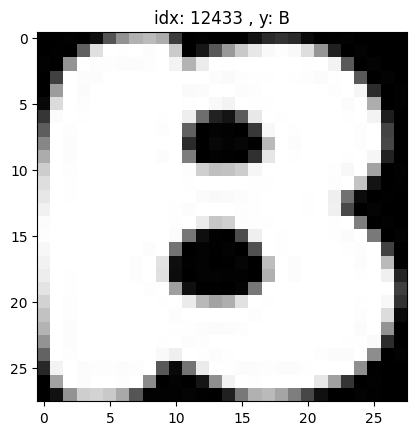

In [ ]:
rand_i = np.random.randint(0, x.shape[0])

plt.title( f'idx: {rand_i} , y: {"ABCDEFGHIJ"[ int(y[rand_i]) ]}' )
plt.imshow( x[rand_i, :, :, 0], cmap='gray' )
plt.show()

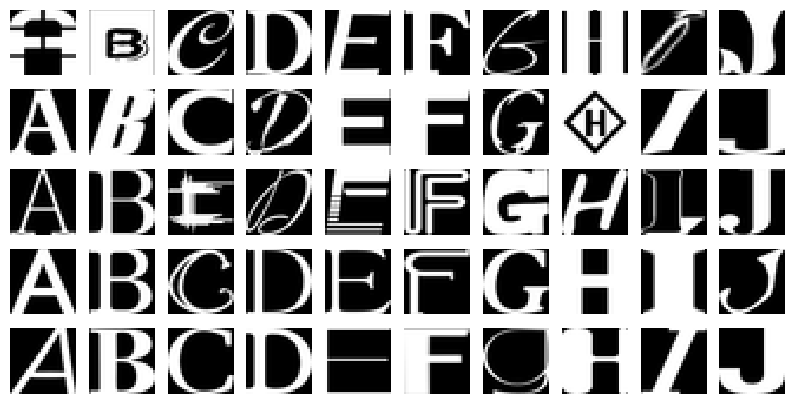

In [ ]:
rows = 5
fig, axes = plt.subplots(rows, classes, figsize=(classes,rows))

for letter_id in range(classes) :
    letters = x[y==letter_id]      # 0부터 9까지 각 숫자에 맞는 array가 letters에 들어간다.
    letters_len = len(letters)

    for row_i in range(rows) :
        axe = axes[row_i, letter_id]
        axe.imshow( letters[np.random.randint(letters_len)], cmap='gray', interpolation='none')
        axe.axis('off')

## Data Preprocessing

* Data split

    - training set : test set = 8 : 2
    - 재현을 위한 난수 고정 : 2024

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=2024)

In [ ]:
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((14979, 28, 28, 1), (14979,), (3745, 28, 28, 1), (3745,))

* Scaling

    - min-max scaling
        - Scikit-Learn의 MinMaxScaler( )는 에러 발생 가능성 높음!

In [ ]:
max_n, min_n = train_x.max(), train_x.min()

In [ ]:
train_x_mm = (train_x - min_n) / (max_n - min_n)
test_x_mm = (test_x - min_n) / (max_n - min_n)

# train_x_mm = train_x / 255.0
# test_x_mm = test_x / 255.0

In [ ]:
train_x_mm.max(), train_x_mm.min()

(1.0, 0.0)

* One-hot encoding

In [ ]:
from keras.utils import to_categorical

In [ ]:
classes_n = len(np.unique(train_y))

In [ ]:
train_y_cat = to_categorical(train_y, classes_n)
test_y_cat = to_categorical(test_y, classes_n)

In [ ]:
train_y_cat.shape

(14979, 10)

* Data shape 재확인

In [ ]:
train_x_mm.shape, train_y_cat.shape

((14979, 28, 28, 1), (14979, 10))

## Modeling
- 조건
    1. Sequential API, Functional API 중 택일
    2. Flatten Layer 사용할 것
    3. Activation Function이 주어진 Dense Layer 뒤에 BatchNormalization 사용할 것
    4. Dropout을 0.2 정도로 사용할 것
    5. Early Stopping을 사용할 것

In [ ]:
import keras

keras.__version__

'3.6.0.dev2024101603'

In [ ]:
## Sequential API
## 1. 세션 클리어
keras.utils.clear_session()

## 2. 모델 블록 쌓을 발판 선언 : Sequential()
model = keras.models.Sequential()

## 3. 모델 블록 쌓기 : .add()
model.add( keras.layers.Input(shape=(28,28,1)) )
model.add( keras.layers.Flatten() )
model.add( keras.layers.Dense(128, activation='relu') )
model.add( keras.layers.BatchNormalization() )
model.add( keras.layers.Dropout(0.2) )
model.add( keras.layers.Dense(64, activation='relu') )
model.add( keras.layers.BatchNormalization() )
model.add( keras.layers.Dropout(0.2) )
model.add( keras.layers.Dense(32, activation='relu') )
model.add( keras.layers.BatchNormalization() )
model.add( keras.layers.Dropout(0.2) )
model.add( keras.layers.Dense(10, activation='softmax') )

## 4. 모델 구조 확인 : .summary()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,042 (437.66 KB)

 Trainable params: 111,594 (435.91 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
## Functional API
## 1. 세션 클리어
keras.utils.clear_session()

## 2. 레이어 사슬처럼 엮기
il = keras.layers.Input(shape=(28,28,1))
hl = keras.layers.Flatten()(il)
hl = keras.layers.Dense(128, activation='relu')(hl)
hl = keras.layers.BatchNormalization()(hl)
hl = keras.layers.Dropout(0.2)(hl)
hl = keras.layers.Dense(64, activation='relu')(hl)
hl = keras.layers.BatchNormalization()(hl)
hl = keras.layers.Dropout(0.2)(hl)
hl = keras.layers.Dense(32, activation='relu')(hl)
hl = keras.layers.BatchNormalization()(hl)
hl = keras.layers.Dropout(0.2)(hl)
ol = keras.layers.Dense(10, activation='softmax')(hl)

## 3. 모델의 시작과 끝 레이어 지정
model = keras.models.Model(il, ol)

## 4. 요약
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,042 (437.66 KB)

 Trainable params: 111,594 (435.91 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
## compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )

* Early stopping

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor='val_loss',        ## 얼리스토핑을 적용할 관측 지표
                   min_delta=0,               ## threshold. 이 값보다 더 크게 지표가 변화해야 성능 개선으로 간주!
                   patience=3,                ## 성능 개선이 발생하지 않았을 때, 몇 epochs 더 지켜볼 것인지
                   verbose=1,                 ## 얼리스토핑이 적용된 epoch 알려줌
                   restore_best_weights=True, ## 최적의 가중치를 모델에 다시 전달
                   )

* .fit( )

In [ ]:
hist = model.fit(train_x_mm, train_y_cat, validation_split=0.2,
                 epochs=10000, verbose=1,
                 callbacks=[es],
                 )

Epoch 1/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6079 - loss: 1.2823 - val_accuracy: 0.8798 - val_loss: 0.4257
Epoch 2/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8488 - loss: 0.5341 - val_accuracy: 0.8782 - val_loss: 0.4056
Epoch 3/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8584 - loss: 0.4892 - val_accuracy: 0.8965 - val_loss: 0.3496
Epoch 4/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8678 - loss: 0.4549 - val_accuracy: 0.9032 - val_loss: 0.3294
Epoch 5/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8865 - loss: 0.4053 - val_accuracy: 0.8969 - val_loss: 0.3442
Epoch 6/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8912 - loss: 0.3790 - val_accuracy: 0.9032 - val_loss: 0.3351
Epoch 7/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8912 - loss: 0.3704 - val_accuracy: 0.9029 - val_loss: 0.3256
Epoch 8/10000
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9078 - loss: 0

* .evaluate( )

In [ ]:
model.evaluate(test_x_mm, test_y_cat)

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9165 - loss: 0.2784


[0.29410403966903687, 0.9153538346290588]

* .predict( )

In [ ]:
y_pred = model.predict(test_x_mm)
y_pred[:3]

118/118 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[9.98369575e-01, 6.73758041e-05, 6.56782940e-05, 1.03975304e-04,
        7.71493360e-05, 7.19526579e-05, 5.27388765e-05, 8.31825833e-04,
        7.04150953e-05, 2.89387710e-04],
       [4.68937028e-03, 9.67029110e-03, 3.79507313e-03, 1.20403534e-02,
        6.35426678e-03, 9.21814680e-01, 1.21050244e-02, 6.91767596e-03,
        1.11581068e-02, 1.14550041e-02],
       [5.96760830e-04, 9.65075102e-03, 7.03396567e-04, 9.84539986e-01,
        2.28627672e-04, 3.17383267e-04, 2.19989265e-03, 3.62361985e-04,
        4.83939715e-04, 9.16828285e-04]], dtype=float32)

In [ ]:
# 원핫 인코딩 한 것을 다시 묶어주는 코드
# 평가 지표 및 실제 데이터 확인을 위해 필요

y_pred_arg = np.argmax(y_pred, axis=1)
test_y_arg = np.argmax(test_y_cat, axis=1)

In [ ]:
y_pred_arg.shape
y_pred_arg[:3]

array([0, 5, 3])

* 평가 지표

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F',' G', 'H', 'I', 'J']

print( classification_report(test_y_arg, y_pred_arg, target_names=class_names) )

              precision    recall  f1-score   support

           A       0.95      0.90      0.92       360
           B       0.91      0.91      0.91       382
           C       0.95      0.94      0.95       385
           D       0.88      0.93      0.90       373
           E       0.93      0.90      0.91       364
           F       0.91      0.96      0.93       392
           G       0.85      0.92      0.88       390
           H       0.96      0.93      0.94       364
           I       0.95      0.82      0.88       360
           J       0.90      0.95      0.92       375

    accuracy                           0.92      3745
   macro avg       0.92      0.91      0.92      3745
weighted avg       0.92      0.92      0.92      3745



## Visualization

* 실제 데이터 확인

idx = 1330
해당 인덱스의 이미지는 I
모델의 예측 : I
모델의 클래스별 확률 : 
-------------------
A 1.0
B 7.0
C 1.0
D 5.0
E 4.0
F 3.0
G 1.0
H 1.0
I 68.0
J 4.0
정답


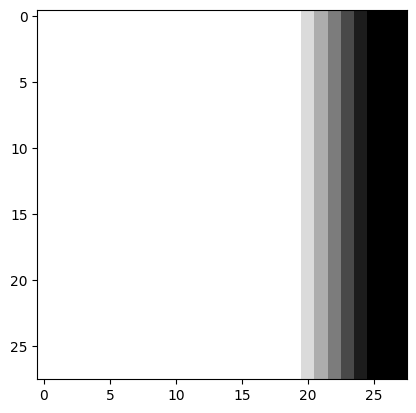

In [ ]:
letters_str = "ABCDEFGHIJ"

rand_idx = np.random.randint(0, len(y_pred_arg))
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {letters_str[test_idx]}')
print(f'모델의 예측 : {letters_str[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate(letters_str) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(test_x[rand_idx], cmap='gray')
plt.show()

* 틀린 이미지만 확인해보기

In [ ]:
temp = (test_y_arg == y_pred_arg)
false_idx = np.where(temp==False)[0]
false_len = len(false_idx)
false_len

317

idx = 813
해당 인덱스의 이미지는 A
모델의 예측 : J
모델의 클래스별 확률 : 
-------------------
A 4.0
B 11.0
C 1.0
D 24.0
E 1.0
F 6.0
G 2.0
H 2.0
I 17.0
J 28.0
땡


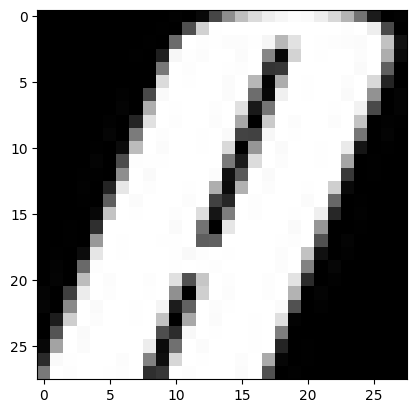

In [ ]:
letters_str = "ABCDEFGHIJ"

rand_idx = false_idx[np.random.randint(0, false_len)]
test_idx = test_y_arg[rand_idx]
pred_idx = y_pred_arg[rand_idx]
class_prob = np.floor( y_pred[rand_idx]*100 )

print(f'idx = {rand_idx}')
print(f'해당 인덱스의 이미지는 {letters_str[test_idx]}')
print(f'모델의 예측 : {letters_str[pred_idx]}')
print(f'모델의 클래스별 확률 : ')
print('-------------------')
for idx, val in enumerate(letters_str) :
    print(val, class_prob[idx])
print('=================================================')

if test_y_arg[rand_idx] == y_pred_arg[rand_idx] :
    print('정답')
else :
    print('땡')

plt.imshow(test_x[rand_idx], cmap='gray')
plt.show()